<a href="https://colab.research.google.com/github/mexlunel19/FirstTry/blob/master/DAIP_Case5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDY 5 
## GROUP 1 

Model script

In [20]:
#libraries and packages used
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

The next part sets up the database for the model

In [ ]:
#Bitcoin trading behaviour
bitcoin1=pd.read_csv('BTC-USD.csv')

In [ ]:
bitcoin1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [ ]:
bitcoin1.shape

(2616, 7)

In [ ]:
bitcoin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2616 non-null   object 
 1   Open       2616 non-null   float64
 2   High       2616 non-null   float64
 3   Low        2616 non-null   float64
 4   Close      2616 non-null   float64
 5   Adj Close  2616 non-null   float64
 6   Volume     2616 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


In [ ]:
# converting date string values into datetime 
index=0
for d in bitcoin1['Date']:
  bitcoin1['Date'][index] = datetime.strptime(d, '%Y-%m-%d')
  index=index+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# since the bitcoin dataset only includes data after 2015, there is no need to 
# create a subset
bitparta=bitcoin1.copy()

In [ ]:
bitparta.shape

(2616, 7)

In [ ]:
# Financial Stress Index dataset
bitcoin2=pd.read_csv('fsi.csv')

In [ ]:
bitcoin2.head()

,Date,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
0,1/3/2000,2.140,0.540,-0.051,0.670,0.472,0.509,1.769,0.521,-0.150
1,1/4/2000,2.421,0.604,0.079,0.627,0.550,0.561,2.084,0.474,-0.137
2,1/5/2000,2.297,0.575,0.080,0.653,0.501,0.488,2.023,0.406,-0.132
3,1/6/2000,2.292,0.546,0.082,0.581,0.566,0.517,2.064,0.355,-0.127
4,1/7/2000,2.005,0.662,-0.011,0.519,0.565,0.270,1.769,0.367,-0.131


In [ ]:
bitcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      5583 non-null   object 
 1   OFR FSI                   5583 non-null   float64
 2   Credit                    5583 non-null   float64
 3   Equity valuation          5583 non-null   float64
 4   Safe assets               5583 non-null   float64
 5   Funding                   5583 non-null   float64
 6   Volatility                5583 non-null   float64
 7   United States             5583 non-null   float64
 8   Other advanced economies  5583 non-null   float64
 9   Emerging markets          5583 non-null   float64
dtypes: float64(9), object(1)
memory usage: 436.3+ KB


In [ ]:
# converting date string values to datetime
index=0
for d in bitcoin2['Date']:
  bitcoin2['Date'][index] = parse(d)
  index=index+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# create a subset with values only from 2015 and from columns Date and FSI
bitpartb=bitcoin2.loc[bitcoin2['Date']>=datetime.strptime('2015 01 01','%Y %m %d'),['Date','OFR FSI']]

In [ ]:
bitpartb.shape

(1810, 2)

In [ ]:
# Gold prices dataset
bitcoin3=pd.read_excel('Prices.xlsx', sheet_name='Daily', header=8, index_col=None)

In [ ]:
bitcoin3.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
0,NaN,NaN,NaN,1978-12-29,226.00,137.06,NaN,110.70,NaN,NaN,...,NaN,NaN,NaN,137.06,NaN,226.00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1979-01-01,226.00,137.06,NaN,110.70,NaN,NaN,...,NaN,NaN,NaN,137.06,NaN,226.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,...,NaN,NaN,107470.04,137.29,NaN,226.80,194.56,NaN,263.74,193.61
3,NaN,NaN,NaN,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,...,NaN,NaN,108027.43,134.01,NaN,218.60,192.23,NaN,264.39,192.97
4,NaN,NaN,NaN,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,...,NaN,NaN,108602.47,136.79,NaN,223.15,193.01,NaN,264.14,194.55
5,NaN,NaN,NaN,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,...,NaN,NaN,110510.44,138.35,NaN,225.50,196.40,NaN,268.39,197.94
6,NaN,NaN,NaN,1979-01-08,223.10,136.38,44436.22,110.15,269.53,372.64,...,NaN,NaN,110356.27,136.38,NaN,223.10,197.16,NaN,269.53,197.92
7,NaN,NaN,NaN,1979-01-09,224.00,137.29,44045.61,110.95,266.30,372.78,...,NaN,NaN,109248.42,137.29,NaN,224.00,195.04,NaN,266.30,195.93
8,NaN,NaN,NaN,1979-01-10,220.70,135.48,43366.38,109.94,261.79,365.87,...,NaN,NaN,108108.33,135.48,NaN,220.70,191.95,NaN,261.79,192.68
9,NaN,NaN,NaN,1979-01-11,220.65,135.94,43770.55,110.19,262.51,370.88,...,NaN,NaN,108771.66,135.94,NaN,220.65,192.35,NaN,262.51,193.81


In [ ]:
bitcoin3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11271 entries, 0 to 11270
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          0 non-null      float64       
 1   Unnamed: 1          0 non-null      float64       
 2   Unnamed: 2          0 non-null      float64       
 3   Name                11271 non-null  datetime64[ns]
 4   US dollar           11271 non-null  float64       
 5   Euro                11271 non-null  float64       
 6   Japanese yen        11269 non-null  float64       
 7   Pound sterling      11271 non-null  float64       
 8   Canadian dollar     11269 non-null  float64       
 9   Swiss franc         11269 non-null  float64       
 10  Indian rupee        11269 non-null  float64       
 11  Chinese renmimbi    9700 non-null   float64       
 12  US dollar.1         11271 non-null  float64       
 13  Turkish lira        10226 non-null  float64   

In [ ]:
# rename the columns as header information was wrong
bitcoin3.rename({'Name': 'Date', 'Swiss franc': 'swiss_franc'}, axis=1, inplace=True)

In [ ]:
# subset with data from 2015 and gold prices in swiss francs
bitpartc=bitcoin3.loc[bitcoin3['Date']>=datetime.strptime('2015 01 01','%Y %m %d'),['Date','swiss_franc']]

In [ ]:
bitpartc.shape

(1877, 2)

Exploring feature behaviour

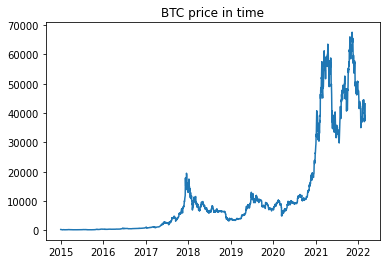

In [ ]:
plt.plot(bitparta['Date'],bitparta['Close'])
a=plt.title('BTC price in time')

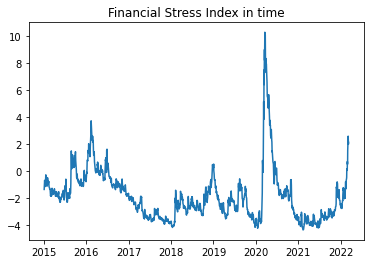

In [ ]:
plt.plot(bitpartb['Date'],bitpartb['OFR FSI'])
a=plt.title('Financial Stress Index in time')

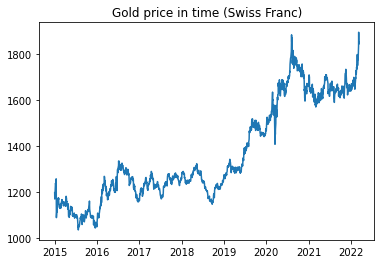

In [ ]:
plt.plot(bitpartc['Date'],bitpartc['swiss_franc'])
a=plt.title('Gold price in time (Swiss Franc)')

In [ ]:
# printing the shape of each subset we noticed is not the same
print(bitpartc.shape)
print(bitpartb.shape)
print(bitparta.shape)

(1877, 2)
(1810, 2)
(2616, 7)


In [ ]:
# we look at the initial dates in our subsets
print(bitparta['Date'].min())
print(bitpartb['Date'].min())
print(bitpartc['Date'].min())

2015-01-01 00:00:00
2015-01-02 00:00:00
2015-01-01 00:00:00


In [ ]:
# bitcoin values are available every day, however, gold trades only when the 
# market is open and the FSI is only calculated in working days according to the
# US calendar. 

# Therefore, we dropped weekend data to match the subsets
index=[]
for d in bitparta['Date']:
  if d.weekday() not in [5,6]:
    index.append(bitparta.index[bitparta['Date']==d].tolist()[0])

In [ ]:
btcweekdays=[]

for i in index:
  btcweekdays.append(bitparta.iloc[i,])

In [ ]:
# Bitcoin dataset without weekends 
btcdf=pd.DataFrame(btcweekdays,columns=bitparta.columns)

In [ ]:
btcdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
5,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
6,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800


In [ ]:
# Gold price subset and FSI also included March values, and we decided our model
# will only include data until Feb 2021
bitpartc['Date'].max() 

Timestamp('2022-03-11 00:00:00')

In [ ]:
FSIdf=bitpartb[bitpartb['Date']<parse('1-March-2022')]

In [ ]:
dates_FSI=list(FSIdf['Date'])
len(dates_FSI)

1801

In [ ]:
dates_btc=list(btcdf['Date'])
len(dates_btc)

1868

In [ ]:
#finding out what dates correspond to the non-working days in the US calendar
dif_btc_FSI=list(set(dates_btc).difference(set(dates_FSI)))
len(dif_btc_FSI)

67

In [ ]:
dif_btc_FSI.sort()
dif_btc_FSI

[Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-01-19 00:00:00'),
 Timestamp('2015-02-16 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2015-05-25 00:00:00'),
 Timestamp('2015-07-03 00:00:00'),
 Timestamp('2015-09-07 00:00:00'),
 Timestamp('2015-11-26 00:00:00'),
 Timestamp('2015-12-25 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-18 00:00:00'),
 Timestamp('2016-02-15 00:00:00'),
 Timestamp('2016-03-25 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-07-04 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2016-11-24 00:00:00'),
 Timestamp('2016-12-26 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-02-20 00:00:00'),
 Timestamp('2017-04-14 00:00:00'),
 Timestamp('2017-05-29 00:00:00'),
 Timestamp('2017-07-04 00:00:00'),
 Timestamp('2017-09-04 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2017-12-25 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-01-

In [ ]:
# dropping the dates
btcdf=btcdf[~btcdf['Date'].isin(dif_btc_FSI)]

In [ ]:
# checking for shape match
print(btcdf.shape)
print(FSIdf.shape)

(1801, 7)
(1801, 2)


In [ ]:
# reapeat for gold prices subset
Golddf=bitpartc[bitpartc['Date']<parse('1-March-2022')]

In [ ]:
dates_gold=list(Golddf['Date'])
len(dates_gold)

1868

In [ ]:
dif_gold_FSI=list(set(dates_gold).difference(set(dates_FSI)))
len(dif_gold_FSI)

67

In [ ]:
# dropping dates
Golddf=Golddf[~Golddf['Date'].isin(dif_gold_FSI)]

In [ ]:
print(btcdf.shape)
print(FSIdf.shape)
print(Golddf.shape)

(1801, 7)
(1801, 2)
(1801, 2)


In [ ]:
FSIdf['Date']=pd.to_datetime(FSIdf['Date'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# merging the subsets to create the final dataset for model building
btc_dataset=pd.merge(pd.merge(btcdf,FSIdf,on='Date'),Golddf,on='Date')

In [ ]:
btc_dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,OFR FSI,swiss_franc
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,-1.369,1171.00
1,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,-0.933,1207.80
2,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,-0.693,1219.63
3,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,-0.817,1231.68
4,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-1.168,1238.11
5,2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,-1.137,1235.71
6,2015-01-12,266.145996,272.203003,265.200012,267.795990,267.795990,18880300,-0.959,1246.43
7,2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,-0.916,1255.39
8,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,-0.649,1258.34
9,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,-0.340,1144.37


In [ ]:
btc_dataset.shape

(1801, 9)

In [ ]:
# writing to csv file for reproduction
btc_dataset.to_csv('dataset_case5.csv',index=False)

## MODEL DESIGN

In [3]:
# reading form the csv file
btc_dataset=pd.read_csv('dataset_case5.csv')

In [ ]:
btc_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OFR FSI,swiss_franc
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,-1.369,1171.00
1,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,-0.933,1207.80
2,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,-0.693,1219.63
3,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,-0.817,1231.68
4,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-1.168,1238.11


In [ ]:
# exploring correlation between selected features
btc_dataset.corr()

,Open,High,Low,Close,Adj Close,Volume,OFR FSI,swiss_franc
Open,1.000000,0.999428,0.999015,0.998523,0.998523,0.723007,-0.347328,0.702990
High,0.999428,1.000000,0.998983,0.999403,0.999403,0.726608,-0.348352,0.702529
Low,0.999015,0.998983,1.000000,0.999268,0.999268,0.715506,-0.346231,0.704228
Close,0.998523,0.999403,0.999268,1.000000,1.000000,0.722791,-0.348045,0.703802
Adj Close,0.998523,0.999403,0.999268,1.000000,1.000000,0.722791,-0.348045,0.703802
Volume,0.723007,0.726608,0.715506,0.722791,0.722791,1.000000,-0.139817,0.760444
OFR FSI,-0.347328,-0.348352,-0.346231,-0.348045,-0.348045,-0.139817,1.000000,-0.105210
swiss_franc,0.702990,0.702529,0.704228,0.703802,0.703802,0.760444,-0.105210,1.000000


The correlation table shows no significant relationship between FSI and gold price in swiss francs with our target variable *Close*, *Adj Close* is highly correalted as it is only an adjustment and will be dropped from the analysis. 

The first four features represent the trade behaviour per day of Bitcoin, as such the correlation values are high and they may be useful for our model. 

*Volume* does not have a strong correlation and it will be investigated further in the model building process.

### Data pre-processing

In [4]:
# data split, we chose to use data until 2021 as our training set and 2021-2022 
# as our test set
data_training=btc_dataset[btc_dataset['Date']<'2021-01-01'].drop(['Date','Adj Close'],axis=1).copy()
data_test=btc_dataset[btc_dataset['Date']>='2021-01-01'].drop(['Date','Adj Close'],axis=1).copy()

In [5]:
# looking at the split size
print(data_training.shape)
print(data_test.shape)

(1511, 7)
(290, 7)


In [6]:
# scaling the data
scaler = MinMaxScaler()
data_training_mms = scaler.fit_transform(data_training)
data_training_mms.shape

(1511, 7)

### First model 

Looks at all seven features as factors for BTC Closing price

In [ ]:
# Creating a data structure with 60 time-steps
X_train = []
y_train = []
for i in range(60, data_training_mms.shape[0]):
    X_train.append(data_training_mms[i-60:i])
    y_train.append(data_training_mms[i,3])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# making sure the data has the right shape for the neural network
X_train.shape

(1451, 60, 7)

In [ ]:
# Recurrent Neural Nerwork
# The network is formed of four LSTM layers and 4 dropout layers to ensure 
# that there is no co-adaptability between the neurons
# The output layer is fully connected and with one neuron to obtain a prediction
# value from the price of Bitcoin at close.

model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
46/46 [==============================] - 21s 281ms/step - loss: 0.0067 - root_mean_squared_error: 0.0821
Epoch 2/120
46/46 [==============================] - 12s 262ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 3/120
46/46 [==============================] - 9s 192ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 4/120
46/46 [==============================] - 12s 259ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488
Epoch 5/120
46/46 [==============================] - 12s 266ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444
Epoch 6/120
46/46 [==============================] - 10s 207ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461
Epoch 7/120
46/46 [==============================] - 9s 198ms/step - loss: 0.0021 - root_mean_squared_error: 0.0456
Epoch 8/120
46/46 [==============================] - 8s 176ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422
Epoch 9/120
46/46 [==============================] - 11s 248ms/step

In [ ]:
# Getting the test set in timesteps format as the training data
inputs = btc_dataset.drop(['Date','Adj Close'],axis=1)[len(btc_dataset) - len(data_test) - 60:].values
inputs.shape

(350, 7)

In [ ]:
# scaling the inputs with the same fitted MinMaxScaler form the training set
inputs = scaler.transform(inputs)

# creating the timesteps sequences
X_test = []
for i in range(60, len(data_test)+60):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# confirming the right shape for prediction
X_test.shape

(290, 60, 7)

In [ ]:
# predicting the values
predicted_btc_price = model.predict(X_test)

In [ ]:
# When using the scaler, the prediction values are also scaled to the same 
# parameters for the training set, we had to reverse this prediction by 
# obtaining the parameters for the target feature and passing to a new scaler 
# class object

[scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_]
rev_scaler=MinMaxScaler()
rev_scaler.min_,rev_scaler.scale_=scaler.min_[3],scaler.scale_[3]

In [ ]:
# Obtaining our prediction values on the original scale
pred_inv_scaled=rev_scaler.inverse_transform(predicted_btc_price)

In [ ]:
pred_inv_scaled.shape

(290, 1)

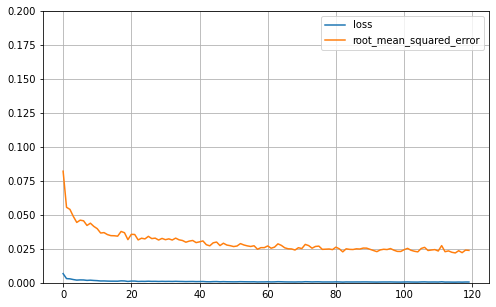

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0,0.2) 
plt.show()

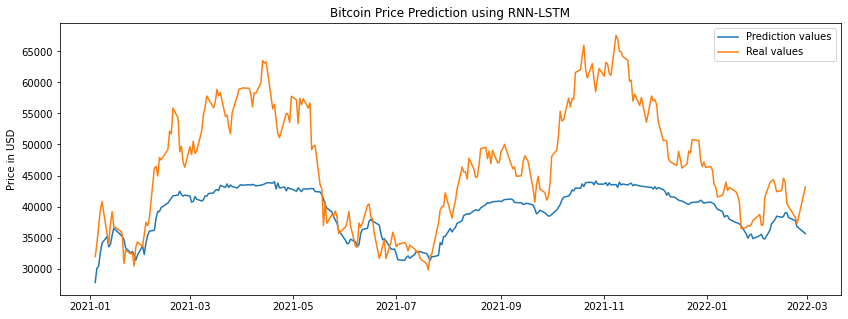

In [490]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))

dates = btc_dataset['Date'][-290:]
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled, label='Prediction values')
plt.plot(x_values,btc_dataset['Close'][-290:], label='Real values')

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.legend()

plt.savefig('Plot_1.png')
plt.show()

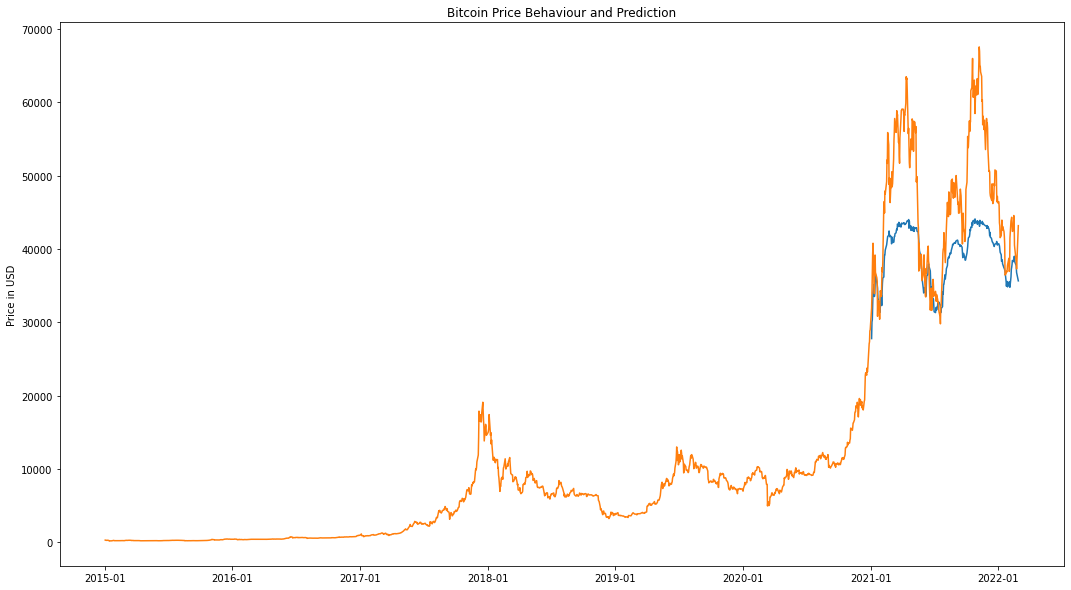

In [491]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))

dates = btc_dataset['Date'][-290:]
dates2 = btc_dataset['Date']
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values2 = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates2]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled)
plt.plot(x_values2,btc_dataset['Close'])

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Behaviour and Prediction')

plt.savefig('Plot_2.png')
plt.show()

In [492]:
print(np.sqrt(mean_squared_error(btc_dataset['Close'][-290:],pred_inv_scaled)))
print(r2_score(btc_dataset['Close'][-290:],pred_inv_scaled))
print(100*mean_absolute_percentage_error(btc_dataset['Close'][-290:],pred_inv_scaled))

9677.852209302626
-0.07122329565270191
14.867337532943786


### Second model 

Looks at all seven features as factors for BTC Closing price, adding crossvalidation

In [7]:
# Creating a data structure with 60 time-steps
X_train = []
y_train = []
for i in range(60, data_training_mms.shape[0]):
    X_train.append(data_training_mms[i-60:i])
    y_train.append(data_training_mms[i,3])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# making sure the data has the right shape for the neural network
X_train.shape

(1451, 60, 7)

In [9]:
# Recurrent Neural Nerwork
# The network is formed of four LSTM layers and 4 dropout layers to ensure 
# that there is no co-adaptability between the neurons
# The output layer is fully connected and with one neuron to obtain a prediction
# value from the price of Bitcoin at close.

model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs = 120, batch_size = 32, validation_split=0.15)

Epoch 1/120
39/39 [==============================] - 12s 50ms/step - loss: 0.0061 - root_mean_squared_error: 0.0779 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 2/120
39/39 [==============================] - 1s 14ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 3/120
39/39 [==============================] - 1s 15ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 4/120
39/39 [==============================] - 1s 14ms/step - loss: 0.0019 - root_mean_squared_error: 0.0430 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 5/120
39/39 [==============================] - 1s 15ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 6/120
39/39 [==============================] - 1s 14ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0059 - val

In [10]:
# Getting the test set in timesteps format as the training data
inputs = btc_dataset.drop(['Date','Adj Close'],axis=1)[len(btc_dataset) - len(data_test) - 60:].values
inputs.shape

(350, 7)

In [11]:
# scaling the inputs with the same fitted MinMaxScaler form the training set
inputs = scaler.transform(inputs)

# creating the timesteps sequences
X_test = []
for i in range(60, len(data_test)+60):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [12]:
# confirming the right shape for prediction
X_test.shape

(290, 60, 7)

In [13]:
# predicting the values
predicted_btc_price = model.predict(X_test)

In [14]:
# When using the scaler, the prediction values are also scaled to the same 
# parameters for the training set, we had to reverse this prediction by 
# obtaining the parameters for the target feature and passing to a new scaler 
# class object

[scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_]
rev_scaler=MinMaxScaler()
rev_scaler.min_,rev_scaler.scale_=scaler.min_[3],scaler.scale_[3]

In [15]:
# Obtaining our prediction values on the original scale
pred_inv_scaled=rev_scaler.inverse_transform(predicted_btc_price)

In [16]:
pred_inv_scaled.shape

(290, 1)

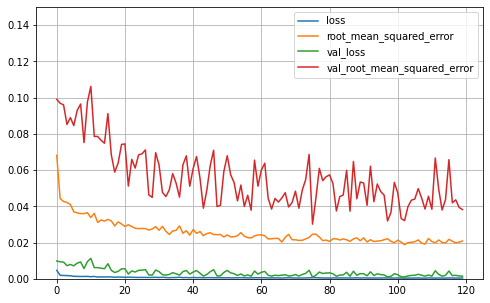

In [500]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0,0.15) 
plt.savefig('Plot_3.png')
plt.show()

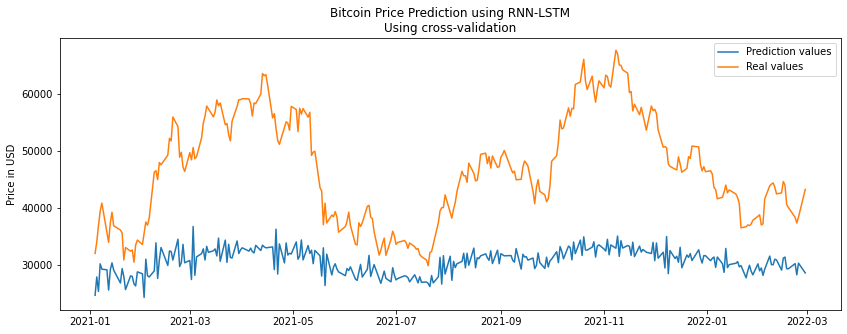

In [501]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))

dates = btc_dataset['Date'][-290:]
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled, label='Prediction values')
plt.plot(x_values,btc_dataset['Close'][-290:], label='Real values')

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction using RNN-LSTM\nUsing cross-validation')
plt.legend()

plt.savefig('Plot_4.png')
plt.show()

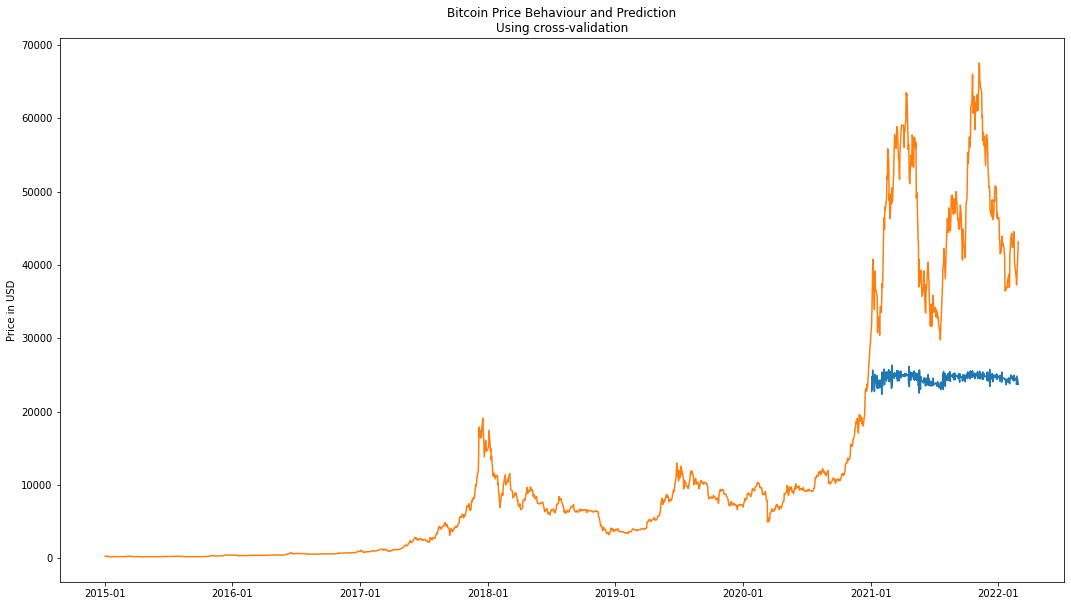

In [17]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))

dates = btc_dataset['Date'][-290:]
dates2 = btc_dataset['Date']
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values2 = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates2]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled)
plt.plot(x_values2,btc_dataset['Close'])

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Behaviour and Prediction\nUsing cross-validation')

plt.savefig('Plot_5.png')
plt.show()

In [21]:
print(np.sqrt(mean_squared_error(btc_dataset['Close'][-290:],pred_inv_scaled)))
print(r2_score(btc_dataset['Close'][-290:],pred_inv_scaled))
print(100*mean_absolute_percentage_error(btc_dataset['Close'][-290:],pred_inv_scaled))

23861.780789846252
-5.512200158775377
45.351176427627905


### Third model 

Finding if FSI and gold price are good indicators

In [504]:
# Looking at column names to find which indices the features have
data_training.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OFR FSI', 'swiss_franc'], dtype='object')

In [22]:
# Creating a data structure with 60 time-steps
X_train = []
y_train = []
for i in range(60, data_training_mms.shape[0]):
    X_train.append(np.delete(data_training_mms[i-60:i],[0,1,2,3,4],1))
    y_train.append(data_training_mms[i,3])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
# making sure the data has the right shape for the neural network
X_train.shape

(1451, 60, 2)

In [24]:
# Recurrent Neural Nerwork
# The network is formed of four LSTM layers and 4 dropout layers to ensure 
# that there is no co-adaptability between the neurons
# The output layer is fully connected and with one neuron to obtain a prediction
# value from the price of Bitcoin at close.

model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
46/46 [==============================] - 5s 15ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303
Epoch 2/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054
Epoch 3/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005
Epoch 4/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969
Epoch 5/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0090 - root_mean_squared_error: 0.0946
Epoch 6/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936
Epoch 7/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916
Epoch 8/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951
Epoch 9/120
46/46 [==============================] - 1s 14ms/step - loss: 0.0080

In [25]:
# Getting the test set in timesteps format as the training data
inputs = btc_dataset.drop(['Date','Adj Close'],axis=1)[len(btc_dataset) - len(data_test) - 60:].values
inputs.shape

(350, 7)

In [26]:
# scaling the inputs with the same fitted MinMaxScaler form the training set
inputs = scaler.transform(inputs)

# creating the timesteps sequences
X_test = []
for i in range(60, len(data_test)+60):
    X_test.append(np.delete(inputs[i-60:i],[0,1,2,3,4],1))
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
# confirming the right shape for prediction
X_test.shape

(290, 60, 2)

In [28]:
# predicting the values
predicted_btc_price = model.predict(X_test)

In [29]:
# When using the scaler, the prediction values are also scaled to the same 
# parameters for the training set, we had to reverse this prediction by 
# obtaining the parameters for the target feature and passing to a new scaler 
# class object

[scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_]
rev_scaler=MinMaxScaler()
rev_scaler.min_,rev_scaler.scale_=scaler.min_[3],scaler.scale_[3]

In [30]:
# Obtaining our prediction values on the original scale
pred_inv_scaled=rev_scaler.inverse_transform(predicted_btc_price)

In [31]:
pred_inv_scaled.shape

(290, 1)

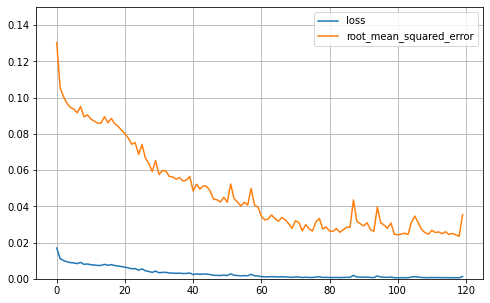

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0,0.15) 
plt.savefig('Plot_6.png')
plt.show()

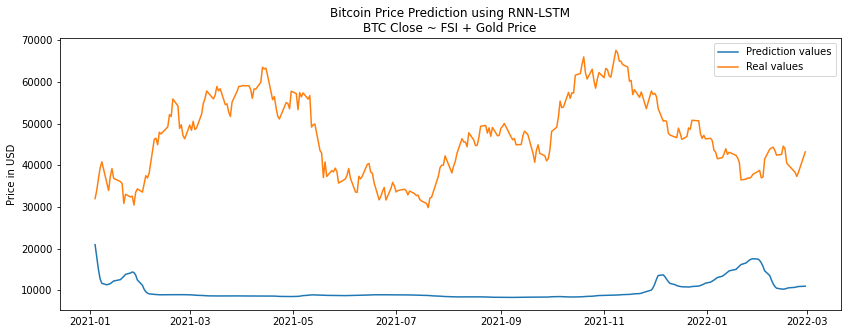

In [33]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))

dates = btc_dataset['Date'][-290:]
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled, label='Prediction values')
plt.plot(x_values,btc_dataset['Close'][-290:], label='Real values')

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction using RNN-LSTM\nBTC Close ~ FSI + Gold Price')
plt.legend()

plt.savefig('Plot_7.png')
plt.show()

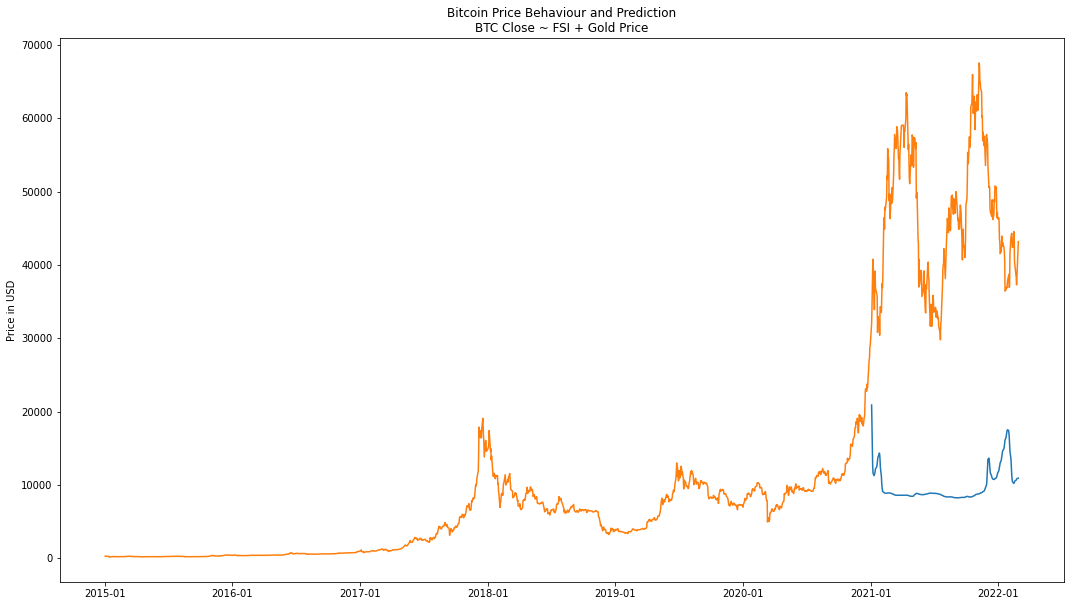

In [34]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))

dates = btc_dataset['Date'][-290:]
dates2 = btc_dataset['Date']
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values2 = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates2]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled)
plt.plot(x_values2,btc_dataset['Close'])

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Behaviour and Prediction\nBTC Close ~ FSI + Gold Price')

plt.savefig('Plot_8.png')
plt.show()

In [38]:
print(np.sqrt(mean_squared_error(btc_dataset['Close'][-290:],pred_inv_scaled)))
print(r2_score(btc_dataset['Close'][-290:],pred_inv_scaled))
print(100*mean_absolute_percentage_error(btc_dataset['Close'][-290:],pred_inv_scaled))

38243.592444556605
-15.727822052679109
77.60298289325765


### Fourth model 

FSI and gold price are not good indicators on their own, what if we coupled them with BTC volume

In [ ]:
# Looking at column names to find which indices the features have
data_training.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OFR FSI', 'swiss_franc'], dtype='object')

In [35]:
# Creating a data structure with 60 time-steps
X_train = []
y_train = []
for i in range(60, data_training_mms.shape[0]):
    X_train.append(np.delete(data_training_mms[i-60:i],[0,1,2,3],1))
    y_train.append(data_training_mms[i,3])
X_train, y_train = np.array(X_train), np.array(y_train)

In [36]:
# making sure the data has the right shape for the neural network
X_train.shape

(1451, 60, 3)

In [37]:
# Recurrent Neural Nerwork
# The network is formed of four LSTM layers and 4 dropout layers to ensure 
# that there is no co-adaptability between the neurons
# The output layer is fully connected and with one neuron to obtain a prediction
# value from the price of Bitcoin at close.

model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
46/46 [==============================] - 5s 16ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173
Epoch 2/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0088 - root_mean_squared_error: 0.0941
Epoch 3/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928
Epoch 4/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0078 - root_mean_squared_error: 0.0884
Epoch 5/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0077 - root_mean_squared_error: 0.0880
Epoch 6/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0070 - root_mean_squared_error: 0.0838
Epoch 7/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853
Epoch 8/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825
Epoch 9/120
46/46 [==============================] - 1s 13ms/step - loss: 0.0062

In [39]:
# Getting the test set in timesteps format as the training data
inputs = btc_dataset.drop(['Date','Adj Close'],axis=1)[len(btc_dataset) - len(data_test) - 60:].values
inputs.shape

(350, 7)

In [40]:
# scaling the inputs with the same fitted MinMaxScaler form the training set
inputs = scaler.transform(inputs)

# creating the timesteps sequences
X_test = []
for i in range(60, len(data_test)+60):
    X_test.append(np.delete(inputs[i-60:i],[0,1,2,3],1))
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
# confirming the right shape for prediction
X_test.shape

(290, 60, 3)

In [42]:
# predicting the values
predicted_btc_price = model.predict(X_test)

In [43]:
# When using the scaler, the prediction values are also scaled to the same 
# parameters for the training set, we had to reverse this prediction by 
# obtaining the parameters for the target feature and passing to a new scaler 
# class object

[scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_]
rev_scaler=MinMaxScaler()
rev_scaler.min_,rev_scaler.scale_=scaler.min_[3],scaler.scale_[3]

In [44]:
# Obtaining our prediction values on the original scale
pred_inv_scaled=rev_scaler.inverse_transform(predicted_btc_price)

In [45]:
pred_inv_scaled.shape

(290, 1)

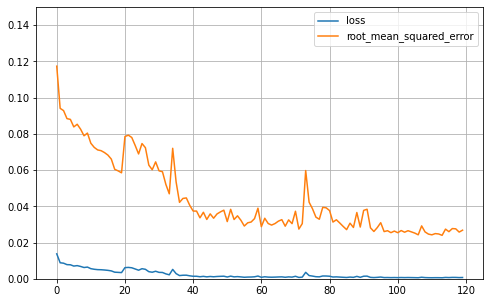

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0,0.15) 
plt.savefig('Plot_9.png')
plt.show()

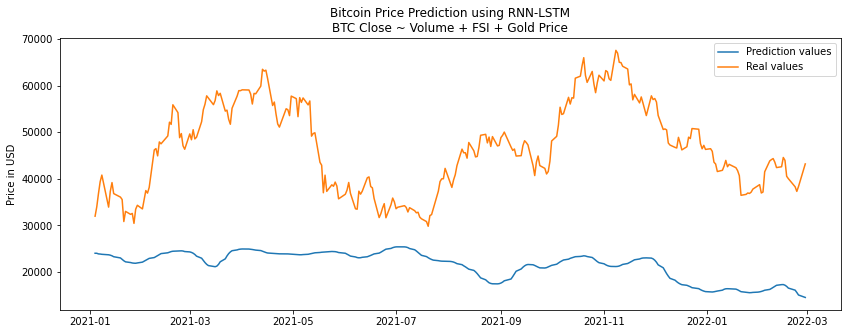

In [543]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))

dates = btc_dataset['Date'][-290:]
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled, label='Prediction values')
plt.plot(x_values,btc_dataset['Close'][-290:], label='Real values')

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction using RNN-LSTM\nBTC Close ~ Volume + FSI + Gold Price')
plt.legend()

plt.savefig('Plot_10.png')
plt.show()

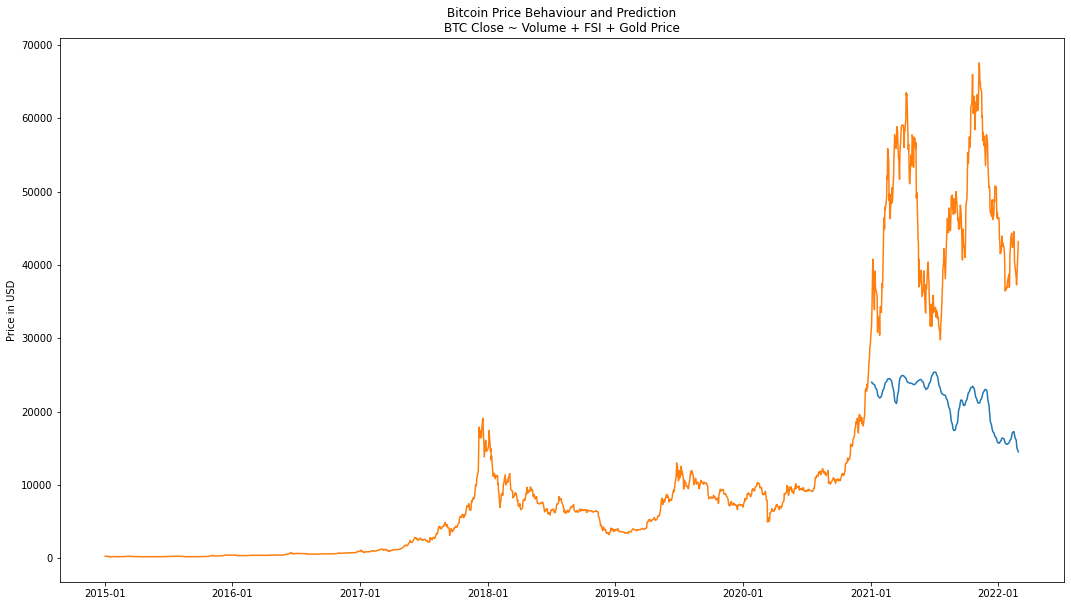

In [544]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))

dates = btc_dataset['Date'][-290:]
dates2 = btc_dataset['Date']
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values2 = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates2]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled)
plt.plot(x_values2,btc_dataset['Close'])

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Behaviour and Prediction\nBTC Close ~ Volume + FSI + Gold Price')

plt.savefig('Plot_11.png')
plt.show()

In [545]:
print(np.sqrt(mean_squared_error(btc_dataset['Close'][-290:],pred_inv_scaled)))
print(r2_score(btc_dataset['Close'][-290:],pred_inv_scaled))
print(100*mean_absolute_percentage_error(btc_dataset['Close'][-290:],pred_inv_scaled))

26850.99152905296
-7.245987883750944
51.90444712017519


### Fifth model 

The exploration so far does not point towards a factor that could correlate with the target variable in question. 

We finally look at prediction only using the BTC behaviour in trading.

In [ ]:
# Looking at column names to find which indices the features have
data_training.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OFR FSI', 'swiss_franc'], dtype='object')

In [546]:
# Creating a data structure with 60 time-steps
X_train = []
y_train = []
for i in range(60, data_training_mms.shape[0]):
    X_train.append(np.delete(data_training_mms[i-60:i],[5,6],1))
    y_train.append(data_training_mms[i,3])
X_train, y_train = np.array(X_train), np.array(y_train)

In [547]:
# making sure the data has the right shape for the neural network
X_train.shape

(1451, 60, 5)

In [548]:
# Recurrent Neural Nerwork
# The network is formed of four LSTM layers and 4 dropout layers to ensure 
# that there is no co-adaptability between the neurons
# The output layer is fully connected and with one neuron to obtain a prediction
# value from the price of Bitcoin at close.

model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
46/46 [==============================] - 15s 143ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928
Epoch 2/120
46/46 [==============================] - 7s 141ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599
Epoch 3/120
46/46 [==============================] - 7s 143ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513
Epoch 4/120
46/46 [==============================] - 7s 145ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 5/120
46/46 [==============================] - 7s 145ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 6/120
46/46 [==============================] - 7s 142ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 7/120
46/46 [==============================] - 7s 143ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428
Epoch 8/120
46/46 [==============================] - 7s 144ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406
Epoch 9/120
46/46 [==============================] - 7s 145ms/step - lo

In [549]:
# Getting the test set in timesteps format as the training data
inputs = btc_dataset.drop(['Date','Adj Close'],axis=1)[len(btc_dataset) - len(data_test) - 60:].values
inputs.shape

(350, 7)

In [550]:
# scaling the inputs with the same fitted MinMaxScaler form the training set
inputs = scaler.transform(inputs)

# creating the timesteps sequences
X_test = []
for i in range(60, len(data_test)+60):
    X_test.append(np.delete(inputs[i-60:i],[5,6],1))
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [551]:
# confirming the right shape for prediction
X_test.shape

(290, 60, 5)

In [552]:
# predicting the values
predicted_btc_price = model.predict(X_test)

In [553]:
# When using the scaler, the prediction values are also scaled to the same 
# parameters for the training set, we had to reverse this prediction by 
# obtaining the parameters for the target feature and passing to a new scaler 
# class object

[scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_]
rev_scaler=MinMaxScaler()
rev_scaler.min_,rev_scaler.scale_=scaler.min_[3],scaler.scale_[3]

In [554]:
# Obtaining our prediction values on the original scale
pred_inv_scaled=rev_scaler.inverse_transform(predicted_btc_price)

In [555]:
pred_inv_scaled.shape

(290, 1)

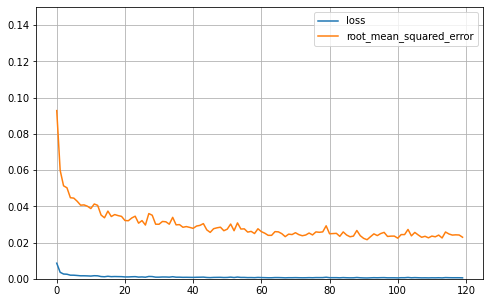

In [556]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0,0.15) 
plt.savefig('Plot_12.png')
plt.show()

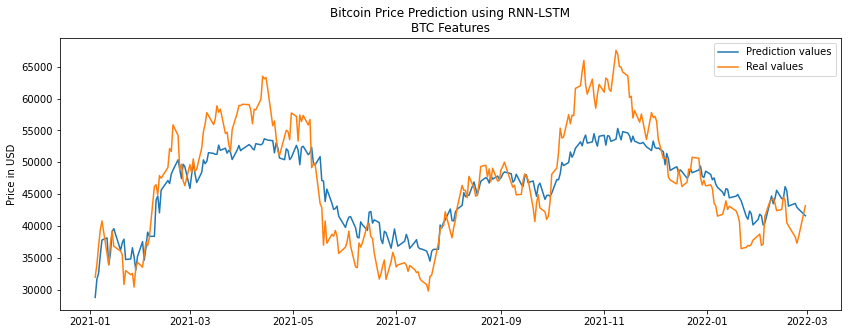

In [557]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))

dates = btc_dataset['Date'][-290:]
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled, label='Prediction values')
plt.plot(x_values,btc_dataset['Close'][-290:], label='Real values')

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction using RNN-LSTM\nBTC Features')
plt.legend()

plt.savefig('Plot_13.png')
plt.show()

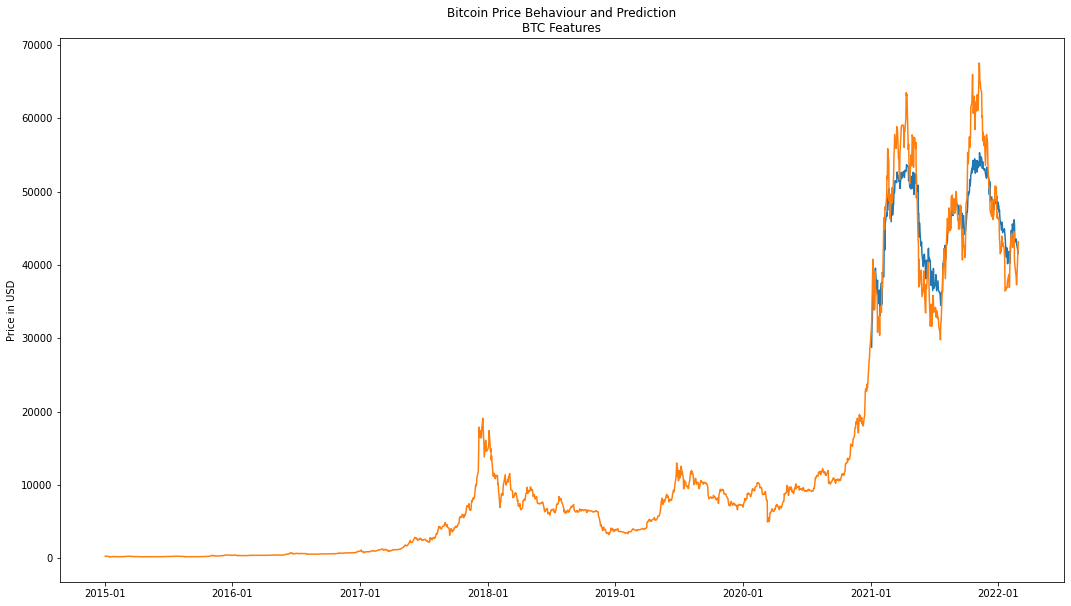

In [558]:
# ploting the predicted values vs the actual values for the test set
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))

dates = btc_dataset['Date'][-290:]
dates2 = btc_dataset['Date']
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values2 = [datetime.strptime(d,"%Y-%m-%d").date() for d in dates2]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values,pred_inv_scaled)
plt.plot(x_values2,btc_dataset['Close'])

plt.ylabel('Price in USD')
plt.title('Bitcoin Price Behaviour and Prediction\nBTC Features')

plt.savefig('Plot_14.png')
plt.show()

In [559]:
print(np.sqrt(mean_squared_error(btc_dataset['Close'][-290:],pred_inv_scaled)))
print(r2_score(btc_dataset['Close'][-290:],pred_inv_scaled))
print(100*mean_absolute_percentage_error(btc_dataset['Close'][-290:],pred_inv_scaled))

4591.787892666721
0.758850883909221
7.865771090192168


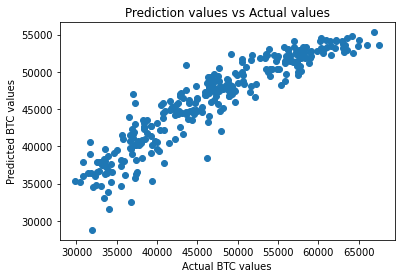

In [565]:
plt.scatter(btc_dataset['Close'][-290:],pred_inv_scaled)
plt.title('Prediction values vs Actual values')
plt.xlabel('Actual BTC values')
a=plt.ylabel('Predicted BTC values')
plt.savefig('Plot_15.png')
plt.show()

### Differencing